<a href="https://colab.research.google.com/github/ameer-qureshi/-YoungDevInterns_Artificial-Intelligence_Tasks/blob/main/ExpertTasks(AI_Internship).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Expert Tasks***

# **Task 1 : Develop an Advanced Model with Hyperparameter Tuning**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


print("Performing GridSearchCV...")
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
best_rf_grid = grid_search.best_estimator_


y_pred_grid = best_rf_grid.predict(X_test)
print("\nClassification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))


print("\nPerforming RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)


print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
best_rf_random = random_search.best_estimator_


y_pred_random = best_rf_random.predict(X_test)
print("\nClassification Report (RandomizedSearchCV):")
print(classification_report(y_test, y_pred_random))

accuracy_grid = accuracy_score(y_test, y_pred_grid)
accuracy_random = accuracy_score(y_test, y_pred_random)

print(f"\nAccuracy with GridSearchCV: {accuracy_grid:.4f}")
print(f"Accuracy with RandomizedSearchCV: {accuracy_random:.4f}")


Performing GridSearchCV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters from GridSearchCV: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Performing RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}

Classification Report (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
    

# **Task 2 : Implement a Deep Learning Model**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 96ms/step - accuracy: 0.8718 - loss: 0.4234 - val_accuracy: 0.9847 - val_loss: 0.0471
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 92ms/step - accuracy: 0.9732 - loss: 0.0895 - val_accuracy: 0.9869 - val_loss: 0.0420
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9783 - loss: 0.0714 - val_accuracy: 0.9890 - val_loss: 0.0317
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.9812 - loss: 0.0596 - val_accuracy: 0.9896 - val_loss: 0.0348
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.9841 - loss: 0.0531 - val_accuracy: 0.9912 - val_loss: 0.0263
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9855 - loss: 0.0462 - val_accuracy: 0.9922 - val_loss: 0.0237
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9856 - loss: 0.0420 - val_accuracy: 0.9896 - val_loss: 0.0298
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.9871 - loss: 0.03

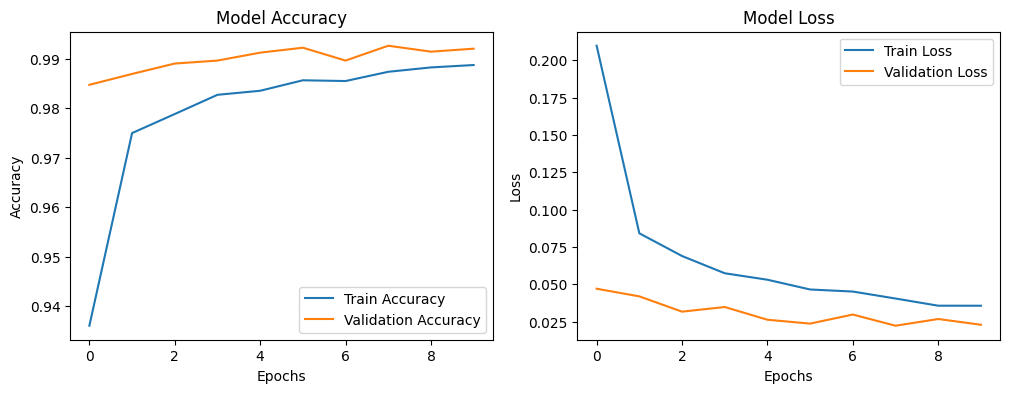

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include channel dimension (needed for CNNs)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Define the CNN architecture
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

# 3. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

# 5. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 6. Plot training history (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **Task 3 : Deploy a Machine Learning Model**

1. Train a Machine Learning Model

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model to a file
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(model, f)


2.Creating a Flask API for the Model

In [8]:
!ngrok authtoken 2ryC5IZoBUOUmFPHzgN5IZfk6zB_22PRFhK7hppwjKwQ539Jq

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install flask flask-cors pyngrok

from flask import Flask, request, render_template_string, jsonify
from pyngrok import ngrok
import pickle
import numpy as np
from sklearn.datasets import load_iris  # Re-import this here

# Load the trained model
with open('iris_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the Iris dataset (to access the target names)
iris = load_iris()

# Initialize Flask app
app = Flask(__name__)

# Home route to display the form
@app.route('/')
def home():
    return render_template_string('''
        <html>
            <body>
                <h2>Enter Data for Iris Classification</h2>
                <form action="/predict" method="POST">
                    Sepal Length: <input type="text" name="sepal_length"><br><br>
                    Sepal Width: <input type="text" name="sepal_width"><br><br>
                    Petal Length: <input type="text" name="petal_length"><br><br>
                    Petal Width: <input type="text" name="petal_width"><br><br>
                    <input type="submit" value="Submit">
                </form>
            </body>
        </html>
    ''')

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the features from the form
        sepal_length = float(request.form['sepal_length'])
        sepal_width = float(request.form['sepal_width'])
        petal_length = float(request.form['petal_length'])
        petal_width = float(request.form['petal_width'])

        # Prepare the feature array
        features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

        # Make the prediction
        prediction = model.predict(features)

        # Convert the prediction to a human-readable class name
        class_name = iris.target_names[prediction][0]

        # Return the prediction
        return render_template_string('''
            <html>
                <body>
                    <h2>The predicted class is: {{ class_name }}</h2>
                    <a href="/">Go back</a>
                </body>
            </html>
        ''', class_name=class_name)

    except Exception as e:
        return jsonify({'error': str(e)}), 400

# Set up ngrok to expose the Flask app
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")

# Run Flask app
app.run(port=5000)


Public URL: NgrokTunnel: "https://e2d5-34-145-114-30.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:16:43] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:16:43] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:16:52] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:16:58] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:17:08] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:17:11] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:17:20] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:17:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:34:27] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jan/2025 05:35:26] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0